# Business Understanding

The forecasting of future natural gas consumption patterns is essential for energy planning and ensuring a reliable supply. Time series models, such as ARMA and SARIMA, have been shown to effectively capture the seasonality and growth trends in natural gas usage, providing valuable insights for decision-makers. Additionally, accurate forecasts help in managing the economic aspects of natural gas production and consumption, enabling industries to operate more efficiently and reduce economic risks. Understanding consumption patterns through time series analysis supports the development of sustainable energy policies and can guide investment in infrastructure and technology to meet future energy demands. In summary, time series modeling is a vital tool for organizing an analysis base for natural gas inspection, addressing social issues, and promoting effective and credible energy management in the United States.

Source: https://www.eia.gov/electricity/data/browser/#/topic/2?agg=2,0,1&fuel=f&geo=g&sec=g&linechart=~ELEC.CONS_TOT.NG-US-99.M&columnchart=ELEC.CONS_TOT.COW-US-99.M&map=ELEC.CONS_TOT.COW-US-99.M&freq=M&start=200101&end=202312&ctype=linechart&ltype=pin&rtype=s&maptype=0&rse=0&pin=

# Data Understanding

For this analysis I collected data from the United States Energy Information Administration and within the dataset there are the monthly consumption totals of coal, petroleum liquids, petroleum coke and natural gas for all sectors. This dataset has every month’s usage since January 1, 2001, and ends on December 1, 2023.

In [1]:
#importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings

from random import gauss as gs
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import itertools

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

C:\Users\lbrown\Anaconda3\envs\learn-env\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\lbrown\Anaconda3\envs\learn-env\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\lbrown\Anaconda3\envs\learn-env\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
#loading the dataset

data = pd.read_csv("data/Total_consumption_for_all_sectors.csv")

In [3]:
#viewing the first five rows

data.head()

,description,units,source_key,2001-01-01,2001-02-01,2001-03-01,2001-04-01,2001-05-01,2001-06-01,2001-07-01,...,2023-03-01,2023-04-01,2023-05-01,2023-06-01,2023-07-01,2023-08-01,2023-09-01,2023-10-01,2023-11-01,2023-12-01
0,United States : coal,thousand tons,ELEC.CONS_TOT.COW-US-99.M,90951,77545,80268,72530,78810,84486,93653,...,29462,23614,26353,34220,45286,44618,34973,30374,30386,32784
1,United States : petroleum liquids,thousand barrels,ELEC.CONS_TOT.PEL-US-99.M,32350,17915,20239,19059,17661,20112,18089,...,2063,1856,1923,1828,1897,1976,1866,1973,1990,2177
2,United States : petroleum coke,thousand tons,ELEC.CONS_TOT.PC-US-99.M,393,357,354,297,346,359,425,...,173,157,173,198,306,315,278,177,136,176
3,United States : natural gas,thousand Mcf,ELEC.CONS_TOT.NG-US-99.M,457588,417044,476649,491067,543473,604362,755894,...,1062127,982039,1114670,1300402,1599998,1590772,1317030,1139689,1093508,1153560


## Data Preparation

In [4]:
#changing the column name from 'description' to 'date'

df = data.rename(columns={'description': 'Date'})
df.head()

,Date,units,source_key,2001-01-01,2001-02-01,2001-03-01,2001-04-01,2001-05-01,2001-06-01,2001-07-01,...,2023-03-01,2023-04-01,2023-05-01,2023-06-01,2023-07-01,2023-08-01,2023-09-01,2023-10-01,2023-11-01,2023-12-01
0,United States : coal,thousand tons,ELEC.CONS_TOT.COW-US-99.M,90951,77545,80268,72530,78810,84486,93653,...,29462,23614,26353,34220,45286,44618,34973,30374,30386,32784
1,United States : petroleum liquids,thousand barrels,ELEC.CONS_TOT.PEL-US-99.M,32350,17915,20239,19059,17661,20112,18089,...,2063,1856,1923,1828,1897,1976,1866,1973,1990,2177
2,United States : petroleum coke,thousand tons,ELEC.CONS_TOT.PC-US-99.M,393,357,354,297,346,359,425,...,173,157,173,198,306,315,278,177,136,176
3,United States : natural gas,thousand Mcf,ELEC.CONS_TOT.NG-US-99.M,457588,417044,476649,491067,543473,604362,755894,...,1062127,982039,1114670,1300402,1599998,1590772,1317030,1139689,1093508,1153560


In [5]:
#resetting the index as the date field

df.set_index('Date', inplace=True)

In [6]:
df.head()

,units,source_key,2001-01-01,2001-02-01,2001-03-01,2001-04-01,2001-05-01,2001-06-01,2001-07-01,2001-08-01,...,2023-03-01,2023-04-01,2023-05-01,2023-06-01,2023-07-01,2023-08-01,2023-09-01,2023-10-01,2023-11-01,2023-12-01
Date,,,,,,,,,,,,,,,,,,,,,
United States : coal,thousand tons,ELEC.CONS_TOT.COW-US-99.M,90951,77545,80268,72530,78810,84486,93653,95669,...,29462,23614,26353,34220,45286,44618,34973,30374,30386,32784
United States : petroleum liquids,thousand barrels,ELEC.CONS_TOT.PEL-US-99.M,32350,17915,20239,19059,17661,20112,18089,23892,...,2063,1856,1923,1828,1897,1976,1866,1973,1990,2177
United States : petroleum coke,thousand tons,ELEC.CONS_TOT.PC-US-99.M,393,357,354,297,346,359,425,414,...,173,157,173,198,306,315,278,177,136,176
United States : natural gas,thousand Mcf,ELEC.CONS_TOT.NG-US-99.M,457588,417044,476649,491067,543473,604362,755894,813932,...,1062127,982039,1114670,1300402,1599998,1590772,1317030,1139689,1093508,1153560


In [7]:
#dropping unnecessary columns

dataset = df.drop(['units', 'source_key'], axis=1)

In [8]:
#transposing the dataset

gas = dataset.T

In [9]:
#renaming the target column

gas.rename(columns={'United States : natural gas': 'Natural Gas (Mcf)'}, inplace=True)

In [10]:
#dropping unnecessary columns

natural_gas = gas.drop(['United States : coal', 'United States : petroleum liquids', 'United States : petroleum coke'], axis=1)

In [11]:
natural_gas

Date,Natural Gas (Mcf)
2001-01-01,457588
2001-02-01,417044
2001-03-01,476649
2001-04-01,491067
2001-05-01,543473
...,...
2023-08-01,1590772
2023-09-01,1317030
2023-10-01,1139689
2023-11-01,1093508


In [12]:
natural_gas.describe()

Date,Natural Gas (Mcf)
count,2.760000e+02
mean,8.082169e+05
std,2.586120e+05
min,4.145690e+05
25%,5.910722e+05
50%,7.848305e+05
75%,9.835740e+05
max,1.599998e+06


In [13]:
natural_gas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 2001-01-01 to 2023-12-01
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Natural Gas (Mcf)  276 non-null    int64
dtypes: int64(1)
memory usage: 4.3+ KB


# Exploratory Data Analysis

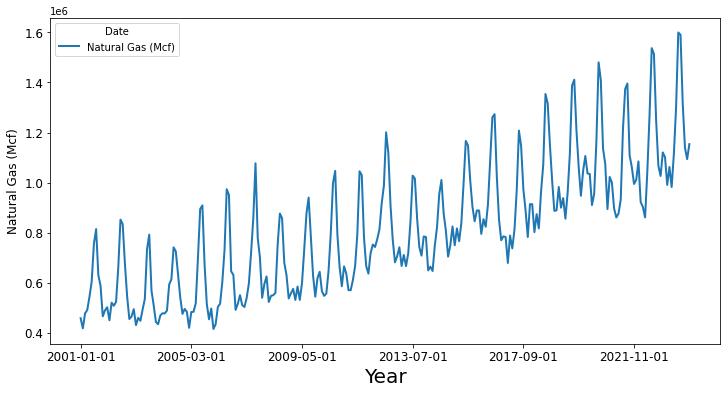

In [14]:
natural_gas.plot(figsize=(12, 6), linewidth=2, fontsize=12)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Natural Gas (Mcf)", fontsize=12);

In [15]:
#splitting the data between train and validation sets 80/20

split = round(natural_gas.shape[0]*0.8)
split

221

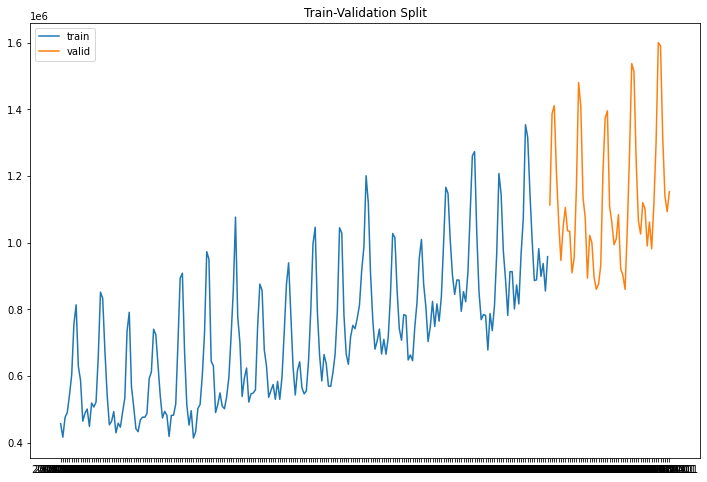

In [16]:
# Define train and test sets according to the index found above
train = natural_gas[:split]

valid = natural_gas[split:]

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(train, label='train')
# ax.plot(valid)
ax.plot(valid, label='valid')
ax.set_title('Train-Validation Split');
plt.legend()

# Modeling

## Baseline Model

In [17]:
train

Date,Natural Gas (Mcf)
2001-01-01,457588
2001-02-01,417044
2001-03-01,476649
2001-04-01,491067
2001-05-01,543473
...,...
2019-01-01,982335
2019-02-01,899291
2019-03-01,938027
2019-04-01,855587


In [18]:
#shifting the dataset by 1

baseline = train.shift(1)
baseline

Date,Natural Gas (Mcf)
2001-01-01,NaN
2001-02-01,457588.0
2001-03-01,417044.0
2001-04-01,476649.0
2001-05-01,491067.0
...,...
2019-01-01,888801.0
2019-02-01,982335.0
2019-03-01,899291.0
2019-04-01,938027.0


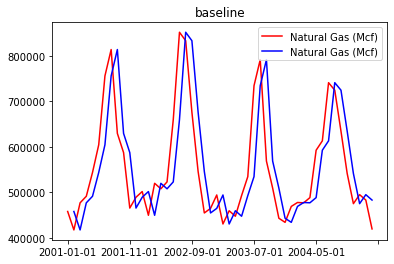

In [19]:
#plotting both the original and shifted dataset

fig, ax = plt.subplots()

train[0:50].plot(ax=ax, c='r', label='original')
baseline[0:50].plot(ax=ax, c='b', label='shifted')
ax.set_title('baseline')
ax.legend();

In [20]:
np.sqrt(mean_squared_error(train[1:], baseline.dropna()))

108276.04226552781

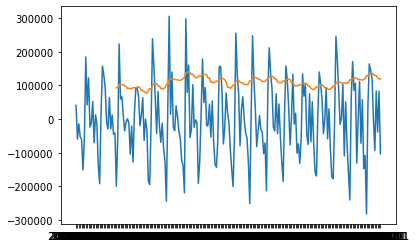

In [21]:
#plotting the residuals

fig, ax = plt.subplots()
residuals = baseline[1:] - train[1:]
ax.plot(residuals.index.to_numpy(), residuals.to_numpy())
ax.plot(residuals.index.to_numpy(), residuals.rolling(30).std().to_numpy());

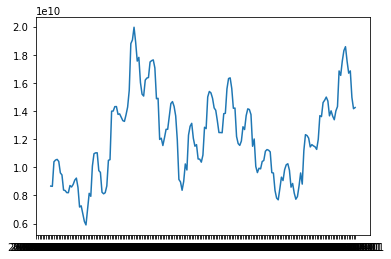

In [22]:
#plotting rolling standard deviation of the errors

fig, ax = plt.subplots()

ax.plot(residuals.index.to_numpy(), residuals.rolling(30).var().to_numpy());

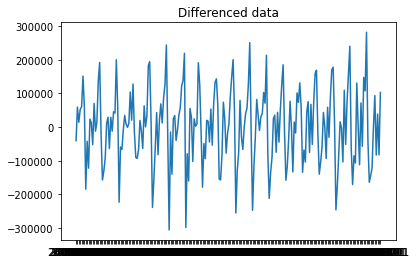

In [23]:
#differencing the data to remove the trend

train_diff = train.diff().dropna()

fig, ax = plt.subplots()
ax.plot(train_diff)
ax.set_title('Differenced data');

## Autoregressive Model (AR)

In [70]:
ar_1 = ARIMA(train_diff, order=(1, 1, 0)).fit()

ar_1.predict(typ='levels')

C:\Users\lbrown\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lbrown\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lbrown\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


2001-02-01        0.000000
2001-03-01   -32538.669650
2001-04-01    39829.542815
2001-05-01    23340.641103
2001-06-01    44904.875999
                  ...     
2019-01-01   -22341.503175
2019-02-01    75481.581881
2019-03-01   -48176.845272
2019-04-01    14689.277856
2019-05-01   -58512.543911
Freq: MS, Name: predicted_mean, Length: 220, dtype: float64

In [25]:
ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      Natural Gas (Mcf)   No. Observations:                  220
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -2878.532
Date:                Wed, 27 Mar 2024   AIC                           5761.064
Time:                        18:37:26   BIC                           5767.842
Sample:                    02-01-2001   HQIC                          5763.801
                         - 05-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1975      0.058     -3.399      0.001      -0.311      -0.084
sigma2      1.532e+10   4.06e-13   3.77e+22      0.000    1.53e+10    1.53e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):                39.90
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):               1.20   Skew:                            -0.95
Prob(H) (two-sided):                  0.43   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [26]:
ar_1.aic

5761.063693218819

In [53]:
y_hat_ar1 = ar_1.predict(typ='levels')
np.sqrt(mean_squared_error(train_diff, y_hat_ar1))

123378.11735249091

In [28]:
#running another AR model but with 2 in the position of class order

ar_2 = ARIMA(train_diff, order=(2, 1, 0)).fit()

ar_2.predict(typ='levels')

C:\Users\lbrown\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lbrown\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lbrown\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


2001-02-01        0.000000
2001-03-01   -32579.101009
2001-04-01    43129.096003
2001-05-01     9300.386412
2001-06-01    50727.170661
                  ...     
2019-01-01   -29338.611573
2019-02-01    53830.304175
2019-03-01   -57051.998784
2019-04-01    38217.880771
2019-05-01   -73656.237997
Freq: MS, Name: predicted_mean, Length: 220, dtype: float64

In [29]:
ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      Natural Gas (Mcf)   No. Observations:                  220
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -2875.953
Date:                Wed, 27 Mar 2024   AIC                           5757.907
Time:                        18:37:26   BIC                           5768.074
Sample:                    02-01-2001   HQIC                          5762.013
                         - 05-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2266      0.064     -3.568      0.000      -0.351      -0.102
ar.L2         -0.1533      0.080     -1.911      0.056      -0.311       0.004
sigma2      1.502e+10   4.78e-13   3.15e+22      0.000     1.5e+10     1.5e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.49   Jarque-Bera (JB):                32.64
Prob(Q):                              0.49   Prob(JB):                         0.00
Heteroskedasticity (H):               1.27   Skew:                            -0.85
Prob(H) (two-sided):                  0.31   Kurtosis:                         3.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.27e+38. Standard errors may be unstable.
"""

In [30]:
print(ar_1.aic)
print(ar_2.aic)

5761.063693218819
5757.9069817062455


In [31]:
y_hat_ar1 = ar_2.predict(typ='levels')
np.sqrt(mean_squared_error(train_diff, y_hat_ar1))

121930.77219242706

## Moving Average Model (MA)

In [32]:
ma_1 = ARIMA(train_diff, order=(0, 0, 1)).fit()
y_hat = ma_1.predict(typ='levels')
y_hat

C:\Users\lbrown\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lbrown\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lbrown\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


2001-02-01     2277.077273
2001-03-01   -10932.569816
2001-04-01    26325.338255
2001-05-01    -1827.877357
2001-06-01    20998.360242
                  ...     
2019-01-01    12704.820290
2019-02-01    30183.898175
2019-03-01   -36815.620276
2019-04-01    28361.785091
2019-05-01   -35977.988327
Freq: MS, Name: predicted_mean, Length: 220, dtype: float64

In [33]:
ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      Natural Gas (Mcf)   No. Observations:                  220
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -2848.825
Date:                Wed, 27 Mar 2024   AIC                           5703.650
Time:                        18:37:26   BIC                           5713.831
Sample:                    02-01-2001   HQIC                          5707.761
                         - 05-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2277.0773   9610.394      0.237      0.813   -1.66e+04    2.11e+04
ma.L1          0.3453      0.064      5.407      0.000       0.220       0.470
sigma2      1.077e+10      0.016    6.6e+11      0.000    1.08e+10    1.08e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                 3.09
Prob(Q):                              0.74   Prob(JB):                         0.21
Heteroskedasticity (H):               1.24   Skew:                            -0.27
Prob(H) (two-sided):                  0.35   Kurtosis:                         3.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.54e+33. Standard errors may be unstable.
"""

In [34]:
ma_1 = ARIMA(train_diff, order=(0, 1, 1)).fit()

print(ar_1.aic)
print(ar_2.aic)
print(ma_1.aic)

5761.063693218819
5757.9069817062455
5714.411608198441


C:\Users\lbrown\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lbrown\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lbrown\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [35]:
y_hat_ma1 = ma_1.predict(typ='levels')
np.sqrt(mean_squared_error(train_diff, y_hat_ma1))

109212.2130467487

In [36]:
ma_2 = ARIMA(train_diff, order=(0, 1, 2)).fit()
y_hat = ma_2.predict(typ='levels')
y_hat

C:\Users\lbrown\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lbrown\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lbrown\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


2001-02-01        0.000000
2001-03-01   -29364.921414
2001-04-01    36191.498081
2001-05-01     2248.423612
2001-06-01    34668.222756
                  ...     
2019-01-01    12590.809291
2019-02-01    30528.258974
2019-03-01   -37406.901441
2019-04-01    28600.463226
2019-05-01   -36783.677862
Freq: MS, Name: predicted_mean, Length: 220, dtype: float64

In [37]:
ma_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      Natural Gas (Mcf)   No. Observations:                  220
Model:                 ARIMA(0, 1, 2)   Log Likelihood               -2841.838
Date:                Wed, 27 Mar 2024   AIC                           5689.676
Time:                        18:37:27   BIC                           5699.843
Sample:                    02-01-2001   HQIC                          5693.782
                         - 05-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6497      0.125     -5.186      0.000      -0.895      -0.404
ma.L2         -0.3457      0.089     -3.873      0.000      -0.521      -0.171
sigma2      1.349e+10   6.55e-12   2.06e+21      0.000    1.35e+10    1.35e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                 3.71
Prob(Q):                              0.75   Prob(JB):                         0.16
Heteroskedasticity (H):               1.25   Skew:                            -0.30
Prob(H) (two-sided):                  0.35   Kurtosis:                         3.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.38e+36. Standard errors may be unstable.
"""

In [38]:
print(ar_1.aic)
print(ar_2.aic)
print(ma_1.aic)
print(ma_2.aic)

5761.063693218819
5757.9069817062455
5714.411608198441
5689.676249851111


In [48]:
y_hat_ma2 = ma_2.predict(typ='levels')
np.sqrt(mean_squared_error(train_diff, y_hat_ma2))

102582.09181488215

## ARMA Model

In [40]:
arma_1 = ARIMA(train_diff, order=(2, 1, 2)).fit()

C:\Users\lbrown\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lbrown\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lbrown\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [41]:
arma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      Natural Gas (Mcf)   No. Observations:                  220
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2819.939
Date:                Wed, 27 Mar 2024   AIC                           5649.877
Time:                        18:37:27   BIC                           5666.823
Sample:                    02-01-2001   HQIC                          5656.721
                         - 05-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1198      0.096     11.715      0.000       0.932       1.307
ar.L2         -0.5198      0.107     -4.844      0.000      -0.730      -0.309
ma.L1         -1.9815      0.099    -20.022      0.000      -2.176      -1.788
ma.L2          0.9834      0.099      9.906      0.000       0.789       1.178
sigma2      1.319e+10   4.14e-12   3.19e+21      0.000    1.32e+10    1.32e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.97   Jarque-Bera (JB):                 5.20
Prob(Q):                              0.33   Prob(JB):                         0.07
Heteroskedasticity (H):               1.19   Skew:                             0.33
Prob(H) (two-sided):                  0.45   Kurtosis:                         3.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.46e+37. Standard errors may be unstable.
"""

In [42]:
print(ar_1.aic)
print(ar_2.aic)
print(ma_1.aic)
print(ma_2.aic)
print(arma_1.aic)

5761.063693218819
5757.9069817062455
5714.411608198441
5689.676249851111
5649.877367857812


## ACF and PACF

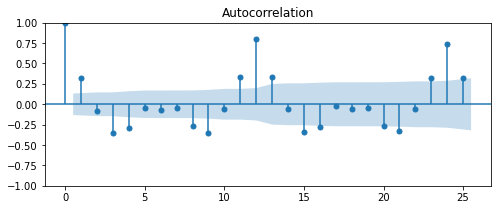

In [43]:
fig, ax = plt.subplots(figsize=(8, 3))
plot_acf(train_diff, ax=ax, lags=25);

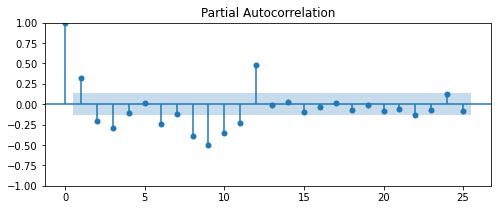

In [44]:
fig, ax = plt.subplots(figsize=(8, 3))
plot_pacf(train_diff, ax=ax, lags=25, method="ywm");

In [45]:
#adding parameters from acf and pacf in to a second arma model to improve the first

arma_2 = ARIMA(train_diff, order=(13, 0, 12)).fit()


# Print out summary information on the fit
print(arma_2.summary())

C:\Users\lbrown\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lbrown\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lbrown\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lbrown\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\lbrown\Anaconda3\envs\learn-env\lib\site-packages\statsmod

                               SARIMAX Results                                
Dep. Variable:      Natural Gas (Mcf)   No. Observations:                  220
Model:               ARIMA(13, 0, 12)   Log Likelihood               -2677.820
Date:                Wed, 27 Mar 2024   AIC                           5409.639
Time:                        18:37:29   BIC                           5501.267
Sample:                    02-01-2001   HQIC                          5446.641
                         - 05-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2277.0773    832.786      2.734      0.006     644.846    3909.308
ar.L1         -0.4834      0.132     -3.669      0.000      -0.742      -0.225
ar.L2          0.0045      0.090      0.050      0.9

In [51]:
print('ar_1: ', ar_1.aic)
print('ar_2: ', ar_2.aic)
print('ma_1: ',  ma_1.aic)
print('ma_2: ', ma_2.aic)
print('arma_1: ', arma_1.aic)
print('arma_2: ', arma_2.aic)

ar_1:  5761.063693218819
ar_2:  5757.9069817062455
ma_1:  5714.411608198441
ma_2:  5689.676249851111
arma_1:  5649.877367857812
arma_2:  5409.639385598053


In [60]:
valid_diff = valid.diff().dropna()
valid_diff.head()

Date,Natural Gas (Mcf)
2019-07-01,274052.0
2019-08-01,23948.0
2019-09-01,-204053.0
2019-10-01,-144786.0
2019-11-01,-115328.0


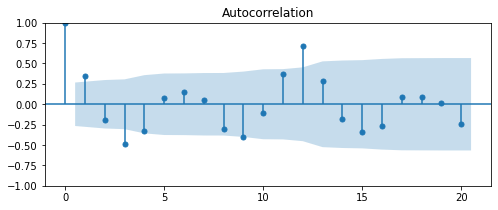

In [61]:
fig, ax = plt.subplots(figsize=(8, 3))
plot_acf(valid_diff, ax=ax, lags=20);

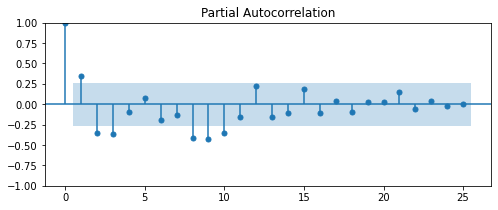

In [62]:
fig, ax = plt.subplots(figsize=(8, 3))
plot_pacf(valid_diff, ax=ax, lags=25, method="ywm");

In [64]:
arma_val = ARIMA(valid_diff, order=(13, 0, 9)).fit()


# Print out summary information on the fit
print(arma_val.summary())

C:\Users\lbrown\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lbrown\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lbrown\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lbrown\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\lbrown\Anaconda3\envs\learn-env\lib\site-packages\statsmod

                               SARIMAX Results                                
Dep. Variable:      Natural Gas (Mcf)   No. Observations:                   54
Model:                ARIMA(13, 0, 9)   Log Likelihood                -675.047
Date:                Wed, 27 Mar 2024   AIC                           1398.094
Time:                        19:18:06   BIC                           1445.829
Sample:                    07-01-2019   HQIC                          1416.504
                         - 12-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        745.8149   2390.764      0.312      0.755   -3939.996    5431.626
ar.L1         -0.7727      1.957     -0.395      0.693      -4.608       3.063
ar.L2         -0.0229      3.329     -0.007      0.9

# Evaluation

## Limitations

## Next Steps